In [1]:
#!/usr/bin/env python
# coding: utf-8

from imageio.core.request import URI_FILENAME
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import pandas as pd
from scipy.interpolate import griddata
import pyvista as pv

import seaborn as sns

In [67]:
# # COMFORT MISMATCH PLOTS
print('VELOCITY DIFFERENCE') 
print(' ')

U4 = 7.4 #velocity inflow 4 m height [m/s]
kappa =0.41
z0 = 0.0002 # roughness length [m]
ustar = U4*kappa/(np.log((4+z0)/z0))     # shouldn not be changed!!
k = pow(ustar,2) / pow(0.09 , .5)
epsilon = pow(ustar,3) / (kappa * (4+z0))

Uph = ustar/kappa*np.log((3.75+z0)/z0)     # shouldn not be changed!!

print ("ustar = ", ustar)
print ("k = ", k)
print ("epsilon = ", epsilon)
print ("Uph = ", Uph)

VELOCITY DIFFERENCE
 
ustar =  0.30635517705549314
k =  0.31284498169567515
epsilon =  0.01753113803303147
Uph =  7.351778807466255


In [89]:
# sampled results from postProcessing > surfaces ##broadleaf conifer ##U_pedestrianH U_z6Normal U_z9Normal U_z12Normal U_z15Normal U_z18Normal
surface_U1 = pv.read('./higherSpeed/LoD3/postProcessing/surfaces/1952/U_pedestrianH.vtk') ###---------need to be changed---------##
U1_mesh1 = pv.PolyData(surface_U1)
windcomfort = U1_mesh1
windcomfort['magnitude'] = np.linalg.norm(windcomfort['U'], axis=1)
windcomfort_scalars = windcomfort.point_data['magnitude']

In [90]:
print(windcomfort_scalars.min())
print(windcomfort_scalars.max())

0.0
7.818753


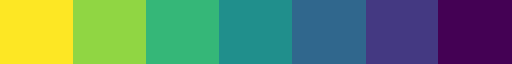

In [91]:
cmap_viridis = plt.cm.get_cmap("viridis_r", 7)
cmap_viridis
# cmap_viridis.colors

In [92]:
# windcomfort_scalars
A = cmap_viridis.colors[0]
B = cmap_viridis.colors[1]
C = cmap_viridis.colors[2]
D = cmap_viridis.colors[3]
E = cmap_viridis.colors[4]
F = cmap_viridis.colors[5]
G = cmap_viridis.colors[6]
# black = np.array([11 / 256, 11 / 256, 11 / 256, 1.0])

scalars = windcomfort_scalars
# mapping = np.linspace(scalars.min(), scalars.max(), 256)
mapping = np.linspace(0, 10, 256)
newcolors = np.empty((256, 4))

newcolors[mapping >= 7.6] = G
newcolors[mapping < 7.6] = F
newcolors[mapping < 5.6] = E
newcolors[mapping < 3.9] = D
newcolors[mapping < 2.4] = C
newcolors[mapping < 1.1] = B
newcolors[mapping < 0.2] = A

# Make the colormap from the listed colors
my_colormap = ListedColormap(newcolors)

# # Make a dictionary for the annotations
# annotations = {
#     4: "D",
#     2.5: "C",
#     1.55: "B",
#     0.25: "A"
# }

annotations = {
    8.7: "G",
    6.6: "F",
    4.75: "E",
    3.15: "D",
    1.75: "C",
    0.65: "B",
    0.1: "A"
}

In [93]:
print(scalars.min())
print(scalars.max())

0.0
7.818753


In [94]:
## bounding box ###---------need to be changed---------##
x_min = -226
y_min = -174
z_min = 0
x_max = 776
y_max = 1626
z_max = 204

# bounds of clipping box specified as [xMin,xMax, yMin,yMax, zMin,zMax] of the 2 outer vertices:
bounds2 = [x_min + 140,x_max - 150, y_min + 150,y_max - 400, 3.75, 3.75]
# bounds2 = [x_min + 150,x_max - 380, y_min + 450,y_max - 800, 3.75, 3.75]
# bounds2 = [x_min + 330,x_max - 180, y_max - 1000,y_max - 500, 3.75, 3.75]

windcomfort_clipped = windcomfort.clip_box(bounds2, invert=False)
windcomfort_clipped_scalars = windcomfort_clipped.point_data['magnitude']

sargs = dict(
    color='k',
    font_family='courier',
    title_font_size=20,
    label_font_size=18,
    fmt="%.1f",
    height=0.05, 
    width=0.6, 
    vertical=False, 
    position_x=0.2, 
    position_y=0.065,
    title='Velocity Magnitude [m/s]',
    #n_colors=7,
    n_labels=8
    )
# plotter set-up (create 2 subplots): bad pedestrian vs. good thermal comfort 
plotter = pv.Plotter(shape=(1, 1), window_size=[1000, 1500], border=False)
plotter.set_background("w")
pv.set_plot_theme("document")

# boring_cmap = plt.cm.get_cmap("RdYlBu_r", 21)

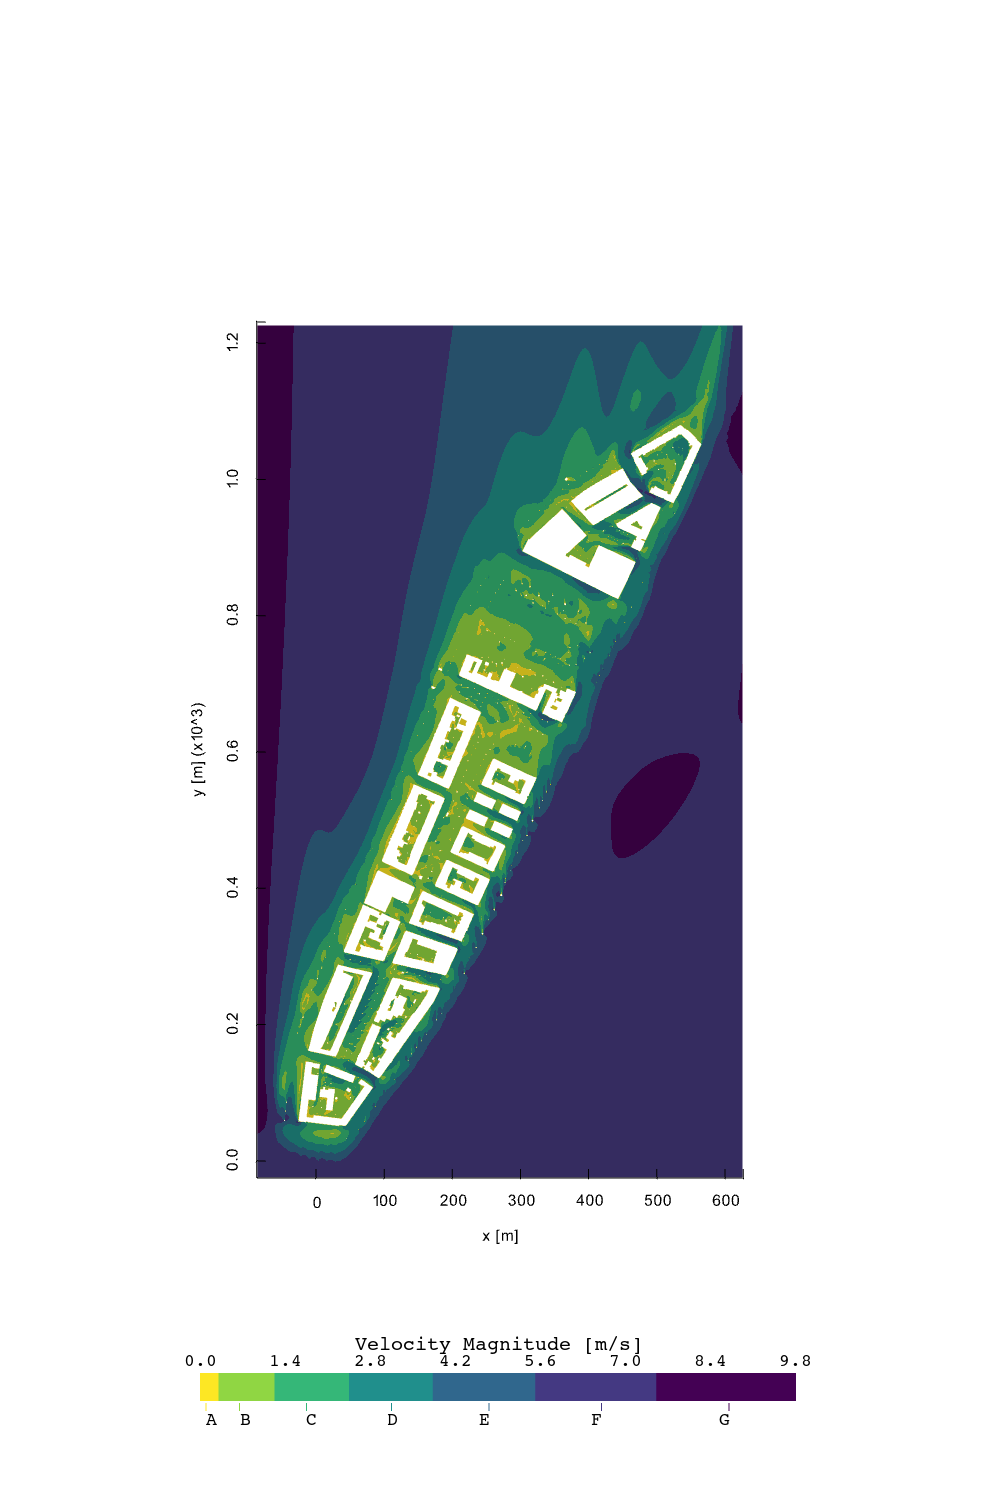

In [95]:
plotter.add_mesh(windcomfort_clipped, scalars=windcomfort_clipped_scalars, scalar_bar_args=sargs, cmap=my_colormap,
                clim=[0,9.8],  annotations = annotations) #cmap="plasma_r"
plotter.show_bounds(xlabel='x [m]', ylabel='y [m]', color='black',font_size=50)
#plotter.add_text('VELOCITY LoD1', font='courier', font_size=9, position='upper_edge')
plotter.view_xy()   # plot the xy-plane
plotter.enable_zoom_style()   # enable to zoom in the image

# show and save the created subplots:  ###---------need to be changed---------##
plotter.show(screenshot='./LoD3_windComfort.png')